In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('cau_1.csv')
df.replace('N/a', 0, inplace=True)
df = df.drop(['Nation', 'Position', 'Team', 'Player'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Columns: 168 entries, Age to Aerial Duels_Won%
dtypes: float64(135), int64(5), object(28)
memory usage: 647.2+ KB


In [ ]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [6]:
# Xác định số cụm k bằng phương pháp Elbow
inertia = []
K = range(1, 21)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\admin\anaconda3\envs\ptit\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\envs\ptit\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\envs\ptit\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\envs\ptit\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

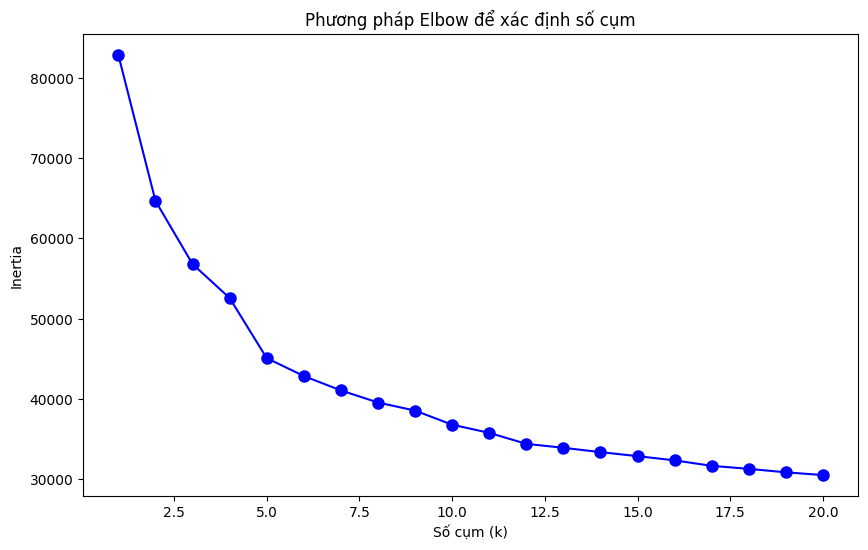

In [7]:
# Vẽ biểu đồ Elbow để chọn số cụm
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để xác định số cụm')
plt.show()

In [8]:
# Áp dụng K-means với số cụm tối ưu
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\admin\anaconda3\envs\ptit\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:

df.head() 


,Age,Playing time_matches played,Playing time_starts,Playing time_minutes,Performance_Assists,Performance_non-Penalty Goals,Performance_Penalty Goals,Performance_Yellow Cards,Performance_Red Cards,Expected_xG,...,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,cluster
0,33.0,11.0,4,436.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,3.0,1.0,11.0,0.0,18.0,6.0,3.0,66.7,4
1,21.0,9.0,9,713.0,0.0,0.0,0.0,5.0,0.0,0.2,...,10.0,16.0,0.0,5.0,0.0,42.0,1.0,9.0,10.0,4
2,25.0,6.0,6,540.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0,4
3,20.0,14.0,5,527.0,0.0,0.0,0.0,1.0,0.0,0.3,...,7.0,3.0,1.0,2.0,0.0,24.0,4.0,5.0,44.4,4
4,25.0,22.0,20,1780.0,2.0,0.0,0.0,4.0,0.0,0.1,...,17.0,9.0,0.0,14.0,0.0,94.0,21.0,19.0,52.5,0


### Dựa vào phương pháp Elbow, tôi xác định được nên phân thành 5 cụm

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df['cluster']  

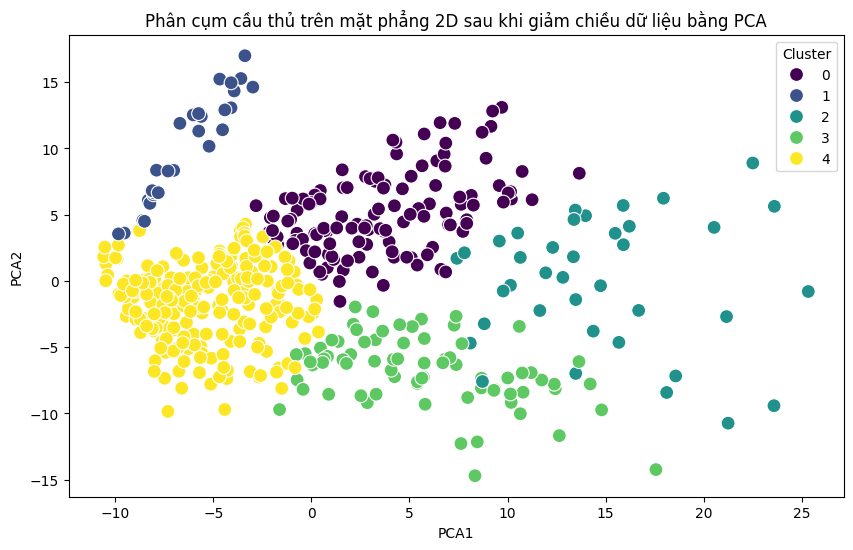

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis', s=100)
plt.title('Phân cụm cầu thủ trên mặt phẳng 2D sau khi giảm chiều dữ liệu bằng PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title="Cluster")
plt.show()